In [1]:
import numpy as np
import h5py
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

In [2]:
file_path_h5 = "/1-fnp/petasaur/p-jbod1/rainier/2023/08/27/decimator_2023-08-27_10.10.00_UTC.h5" # medium earthquake event

with h5py.File(file_path_h5, 'r', locking=False) as f:
    data_h5 = f['Acquisition/Raw[0]/RawData'][:]
    data_time_h5 = f['Acquisition/Raw[0]/RawDataTime'][:]
    data_sample_count_h5 = f['Acquisition/Raw[0]/RawDataSampleCount'][:]


print(data_h5.shape)

(12000, 4494)


In [3]:
# Define highpass filter
def highpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data, axis=0)
    return y

# Apply highpass filter to the data
fs = 200  # Sampling frequency (Hz)
cutoff = 5  # Cutoff frequency (Hz)
filtered_data = highpass_filter(data_h5, cutoff, fs)
print(filtered_data.shape)

(12000, 4494)


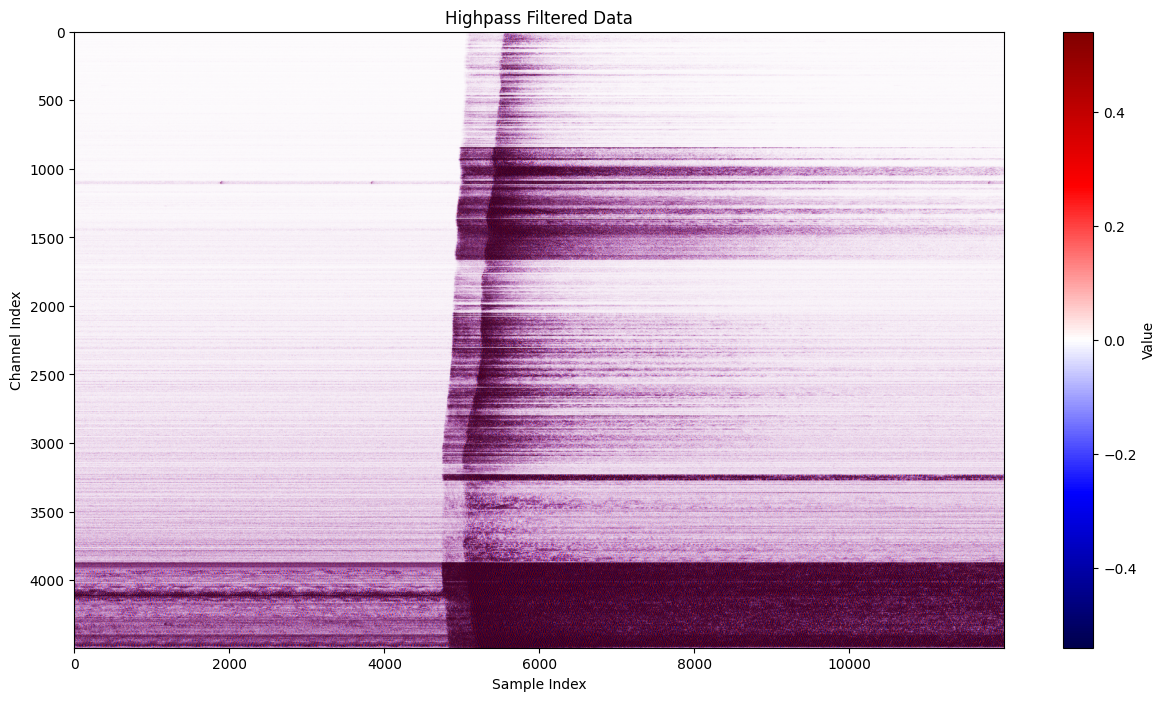

In [4]:
filtered_data_max = np.percentile(np.abs(filtered_data), 90)

# Plot the filtered data
plt.figure(figsize=(15, 8))
plt.imshow(filtered_data.T, aspect='auto', cmap='seismic', vmin=-filtered_data_max, vmax=filtered_data_max)
plt.colorbar(label='Value')
plt.title("Highpass Filtered Data")
plt.xlabel("Sample Index")
plt.ylabel("Channel Index")
plt.show()